# Analiz

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Housing.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Veri kümesi 1338 satır ve 21 sütun içermektedir. Her satır, bir ev satışına ilişkin bilgileri içerir. Amacımız, diğer sütunlardaki değerleri kullanarak "price" sütunundaki değeri tahmin etmektir. Bu sayede, evin özelliklerine dayanarak yeni satışların fiyatlarını tahmin edebiliriz.

Veri kümesinde yer alan sütunlar şunlardır:

In [3]:
# Veri kümesi hakkında bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Eksik değerleri kontrol
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Verilere kontrol ettiğimizde boş değerimiz bulunmamaktadır. Bu yüzden eksik verileri tamamlama adımını atlıyoruz.

Veri dağılımını inceleyelim

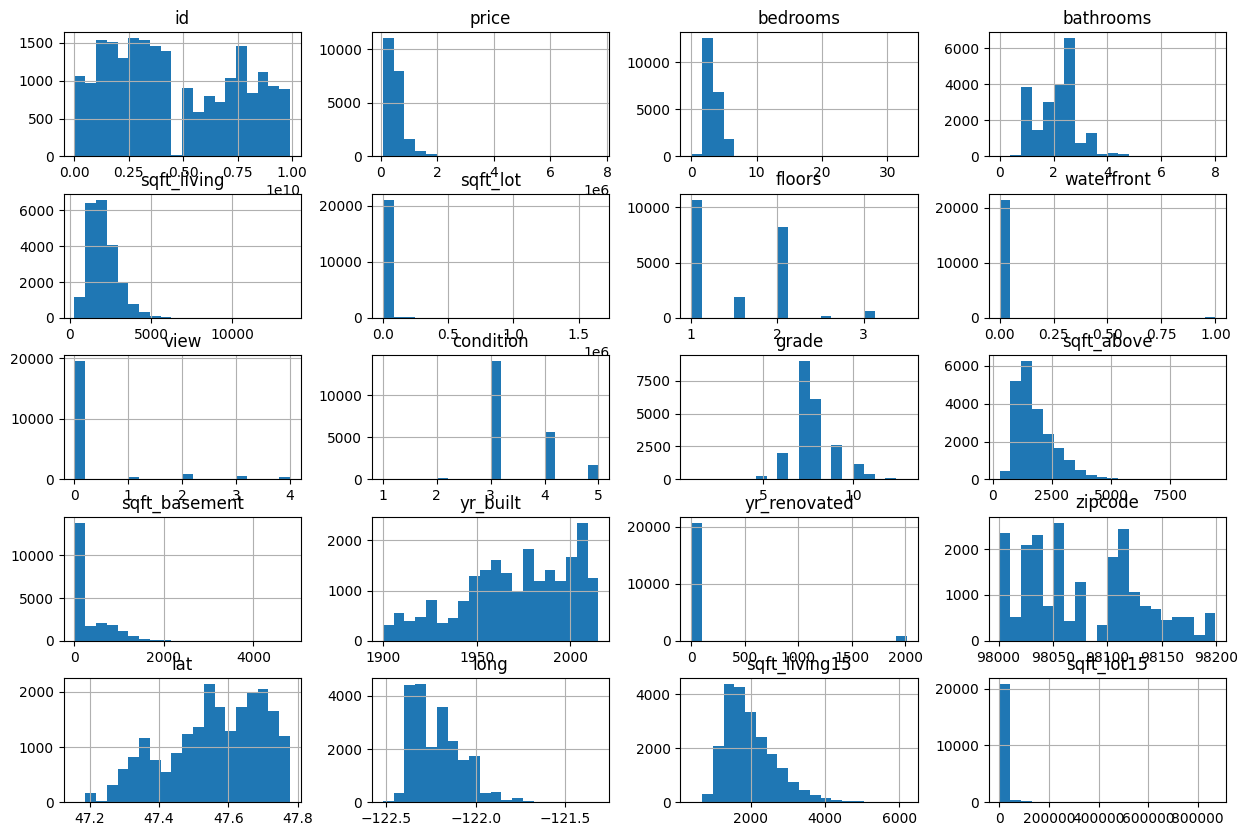

In [6]:
import matplotlib.pyplot as plt
# Sayısal değişkenlerin dağılımını görselleştirme
data.hist(bins=20, figsize=(15, 10))
plt.show()

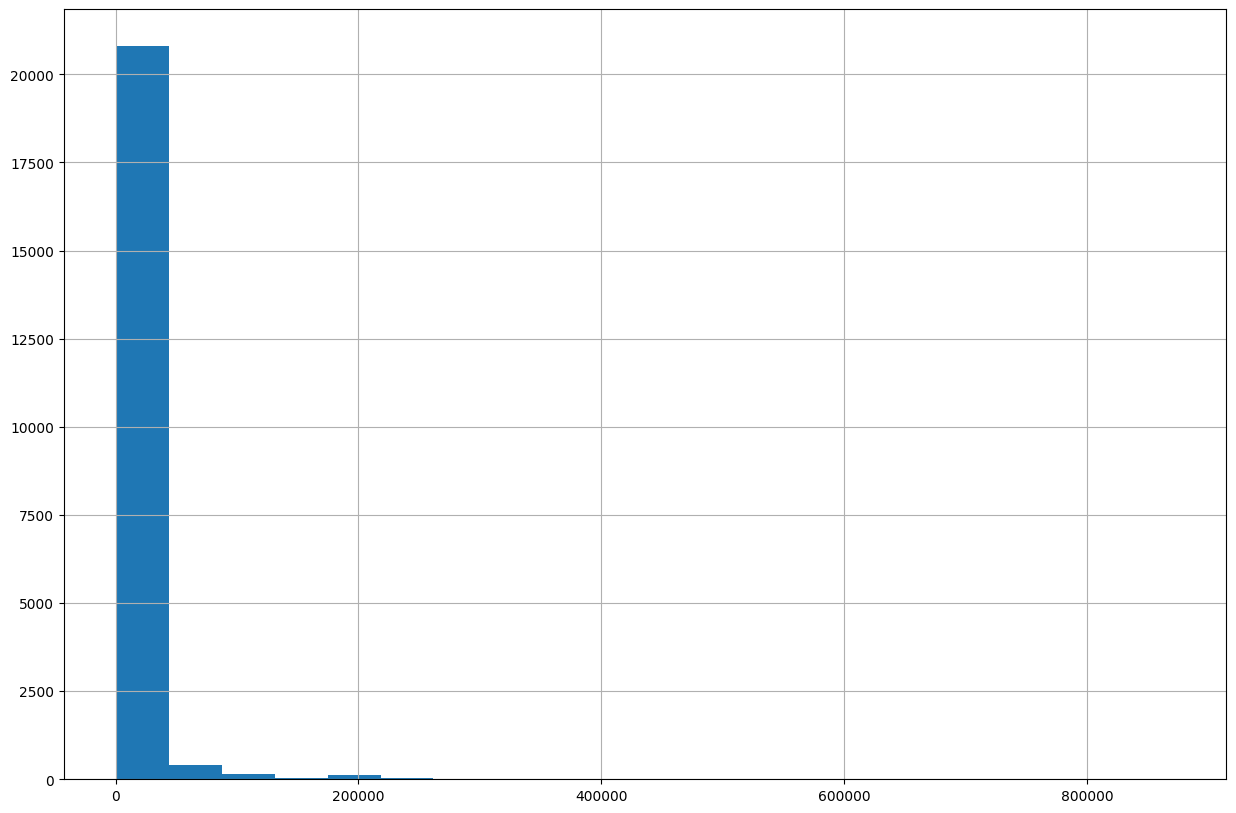

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [7]:
data["sqft_lot15"].hist(bins=20, figsize=(15, 10))
plt.show()
data["sqft_lot15"].describe()

Price (fiyat) sütununun diğer sütunlar ile arasında ki ilişkiye bakalım.

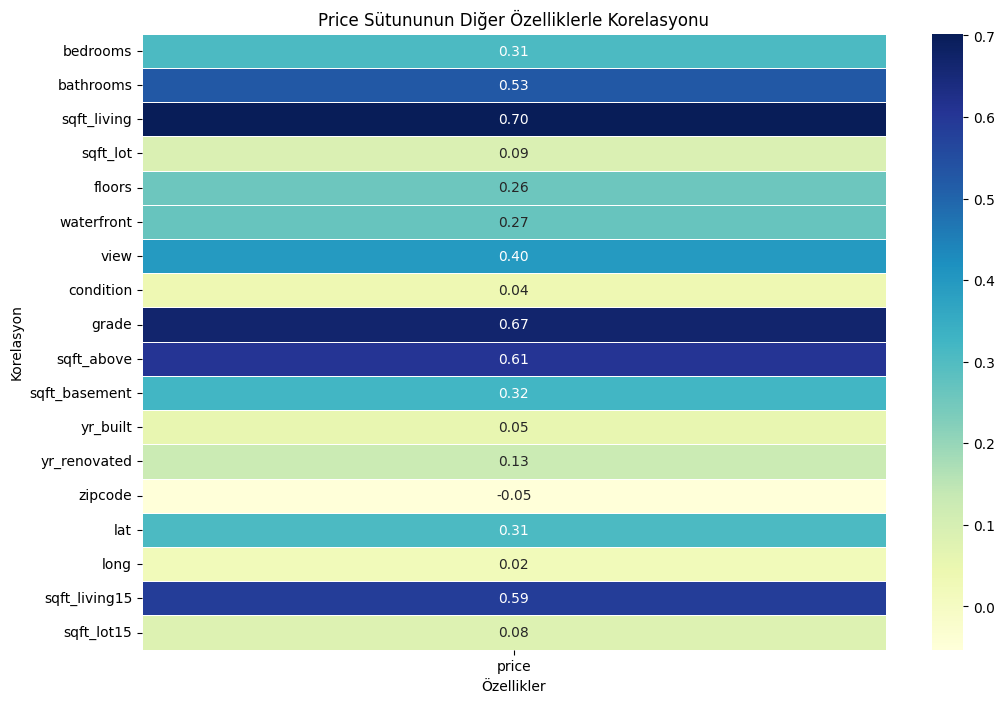

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
heat_data = data.drop(["date"], axis=1).corr()

# 'price' sütununun diğer sütunlarla olan korelasyonunu alma
price_corr = heat_data[['price']].drop(['id', 'price'])  # Sadece 'price' sütununu al ve 'price' sütununu çıkar

# Heatmap oluşturma
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama
sns.heatmap(price_corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Grafik başlığı ve etiketler
plt.title('Price Sütununun Diğer Özelliklerle Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()

GRADE TAHMİN

sqft_living: Yaşam alanı büyüklüğü metrekare cinsinden

grade: Genel not derecesi (1 ila 13) kategorik değişken yap iyi orta kötü

sqft_above: Zemin seviyesinden yüksek yaşam alanı metrekare cinsinden

sqft_living15: En yakın 15 mülkün yaşam alanı büyüklüğü metrekare cinsinden

bathrooms: Banyo sayısı

Price (fiyat) değerinin diğer değerler ile arasında ki ilişkiye bakıyoruz. 

sqft_living, grade, sqft_above, sqft_living15, bathrooms sütunları price sütunu ile arasında doğrusallık olduğunu gözlemliyoruz.

In [9]:
import folium

f = folium.Figure(width=500, height=500)
map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=10).add_to(f)
folium.Marker(location=[data.lat.mean(), data.long.mean()], popup='Merkez Noktamız').add_to(map)

for i in range(10):
    sample_data = data.sample()
    folium.Marker(location=[sample_data.lat, sample_data.long], popup=f'Ev {i+1}').add_to(map)

map

c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


# Ön İşleme

In [10]:
data = data.drop(["id"], axis=1)

In [11]:
# Tarih sütununu yıl ve ay olarak ayır
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.drop('date', axis=1, inplace=True)

Tarih sütununu formatladıktan sonra yıl ve ay değerlerini ayrı sütun olarak ayırıyoruz.

In [14]:
grouped_zipcode = data.groupby(["zipcode"])["price"].mean()
grouped_zipcode

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106486e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

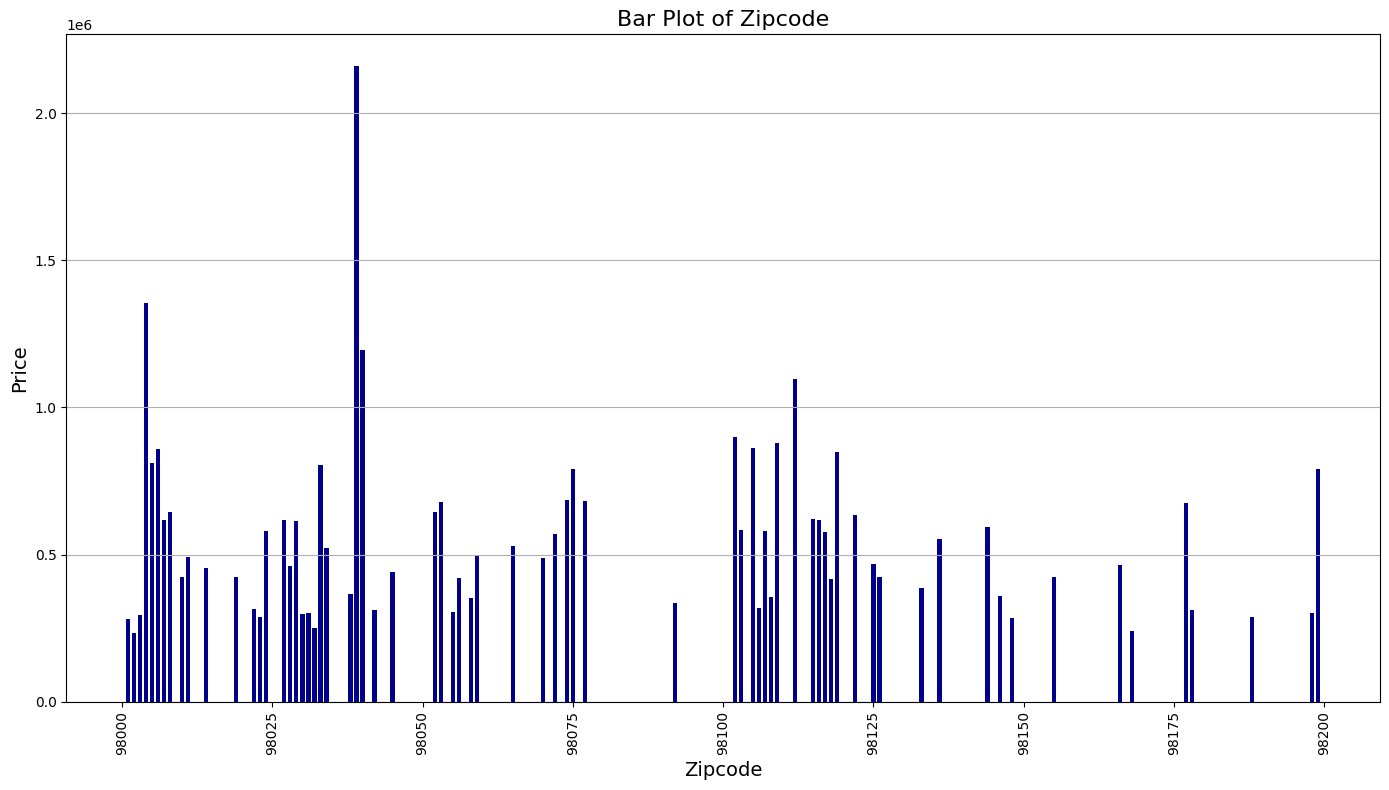

In [54]:
import matplotlib.pyplot as plt

zipcodes = grouped_zipcode.head(70).index
counts = grouped_zipcode.head(70).values

plt.figure(figsize=(14, 8)) 
bar_width = 0.7

plt.bar(zipcodes, counts, color='darkblue', width=bar_width)

plt.title('Bar Plot of Zipcode', fontsize=16)
plt.xlabel('Zipcode', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

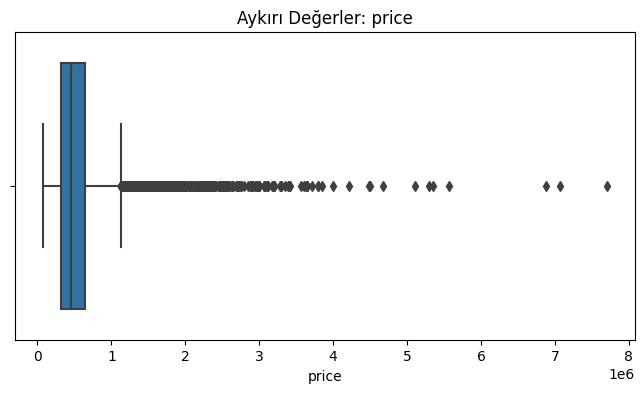

0        12.351475
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21608    12.793862
21609    12.899222
21610    12.904461
21611    12.899222
21612    12.691584
Name: price, Length: 21613, dtype: float64

In [16]:
num_features = data.select_dtypes(np.number).columns

# Aykırı değerleri görselleştirme
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["price"])
plt.title(f"Aykırı Değerler: price")
plt.show()

# Aykırı değerlerin kesilmesi veya dönüştürülmesi (gerekiyorsa)
# Örneğin, log dönüşümü
np.log1p(data['price'])

- posta koduna göre fiyat dağılımı

Grade sütunu değer dağımlarına bakıyoruz.

In [17]:
grade_data = data["grade"].value_counts()

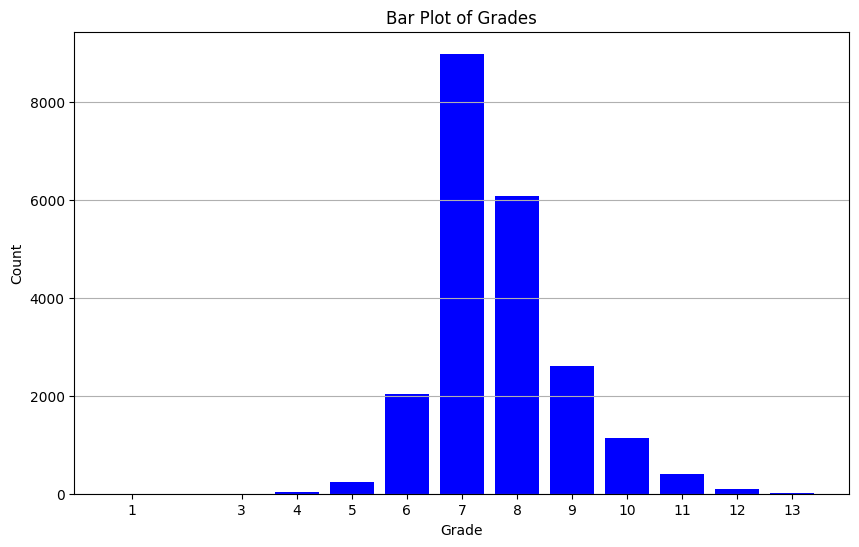

In [18]:
# Verileri x ve y eksenlerine ayırın
grades = grade_data.index
counts = grade_data.values

# Bar plot oluştur
plt.figure(figsize=(10, 6))
plt.bar(grades, counts, color='blue')

# Grafiği düzenle
plt.title('Bar Plot of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(grades)  # X eksenindeki değerleri doğru şekilde etiketle
plt.grid(axis='y')

# Grafiği göster
plt.show()

Grade sütunu dağılımlara baktığımızda bazı değerlerin çok yüksek bazı değerlerin az olması sebebiyle bu değerleri kategorik veriye dönüştürmek model performansını arttıracaktır.

Kötü, Orta, İyi olarak 3 'e bölüyoruz.

In [19]:
def categorize(value):
    if value < 7:
        return "kötü"
    elif 7 <= value <= 9:
        return "orta"
    else:
        return "iyi"

categorized_data = data["grade"].apply(categorize)
data["grade"] = categorized_data

Böldüğümüz verileri modele verebilmek için one-hot uyguluyoruz.

In [20]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[["grade"]])
enc.categories_

[array(['iyi', 'kötü', 'orta'], dtype=object)]

In [53]:
one_hot = enc.transform(data[["grade"]]).toarray()

KeyError: "None of [Index(['grade'], dtype='object')] are in the [columns]"

In [22]:
encoded_cols = list(enc.get_feature_names_out(['grade']))
data[encoded_cols] = one_hot
data.drop(["grade"], axis=1, inplace=True)

Bathrooms sütununda ki değerler ondalıklı olamayacağı için verileri yuvarlıyoruz.

In [23]:
data['bathrooms'] = round(data['bathrooms'])

Verilerimizi modele vermeden önce model performansı için scale işlemi uyguluyoruz.

# Model

- Aykırı değer
- Hiper-parametre turing
- Notebook dosyası ve özet döküman
- model sonuçları yaklaşımlar raporda sunulacak

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def error_calculator(test, pred):
  # MAE
  mae = mean_absolute_error(test, pred)
  # MSE
  mse = mean_squared_error(test, pred, squared=False)
  # RMSE
  rmse = np.sqrt(mse)
  # MAPE
  mape = mean_absolute_percentage_error(test, pred) * 100
  return f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}", mape

In [25]:
import matplotlib.pyplot as plt

def pred_plot(test, pred, model = ""):
  # Figure ve Subplot ayarları
  plt.figure(figsize=(14, 8))
  # İkinci Subplot (Scatter Plot)
  plt.subplot(2, 1, 2)
  plt.scatter(range(len(test)), test, color='blue', label='Gerçek Değerler', alpha=1)
  plt.scatter(range(len(pred)), pred, color='red', label='Tahmin Değerleri', alpha=0.3, marker="x")
  plt.title(f'({model}) Gerçek ve Tahmin Değerleri')
  plt.xlabel('Fiyat')
  plt.ylabel('Değer')
  plt.legend()
  plt.grid(True)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

In [26]:
# Özellikler (X) ve hedef değişkeni (y) tanımla
X = data.drop(['price'], axis=1)
y = data['price']

Tahmin etmek istediğimiz değer price (fiyat) olduğu için data dan price sütunu çıkarıp X değişkenine atıyoruz.
Y değişkenine yani hedef değişkenimize price sütununun değerlerini atıyoruz.

In [27]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisi olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Verilerimizi %70 eğitim ve %30 test olarak 2 ye ayırıyoruz. 

### Basit Model

In [28]:
# Ortalama fiyat tahmin modeli
mean_model = np.full_like(y_test, y_test.mean(), dtype=np.float64)
# Medyan fiyat tahmin modeli
median_model = np.full_like(y_test, y_test.median(), dtype=np.float64)

median_mae, median_mse, median_rmse, median_mape = error_calculator(y_test, median_model)
print(f"Median Model RMSE: {median_rmse}")
print(f"Median Model mape: {round(median_mape)} %")
print("-" * 25)
mean_mae, mean_mse, mean_rmse, mean_mape = error_calculator(y_test, mean_model)
print(f"Mean Model RMSE: {mean_rmse}")
print(f"Mean Model mape: {round(mean_mape)} %")

Median Model RMSE: 625.98
Median Model mape: 43 %
-------------------------
Mean Model RMSE: 616.40
Mean Model mape: 54 %


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


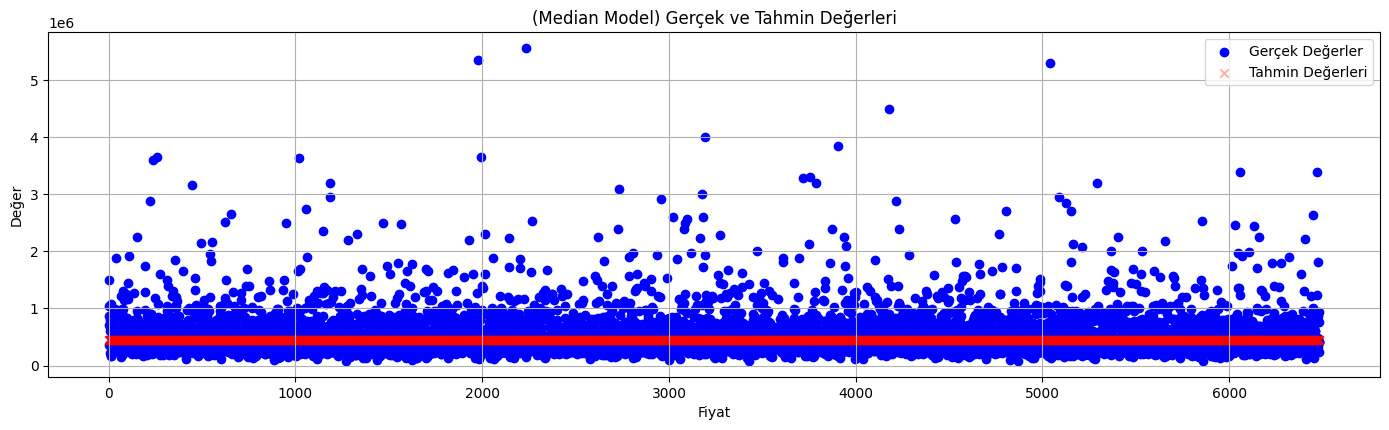

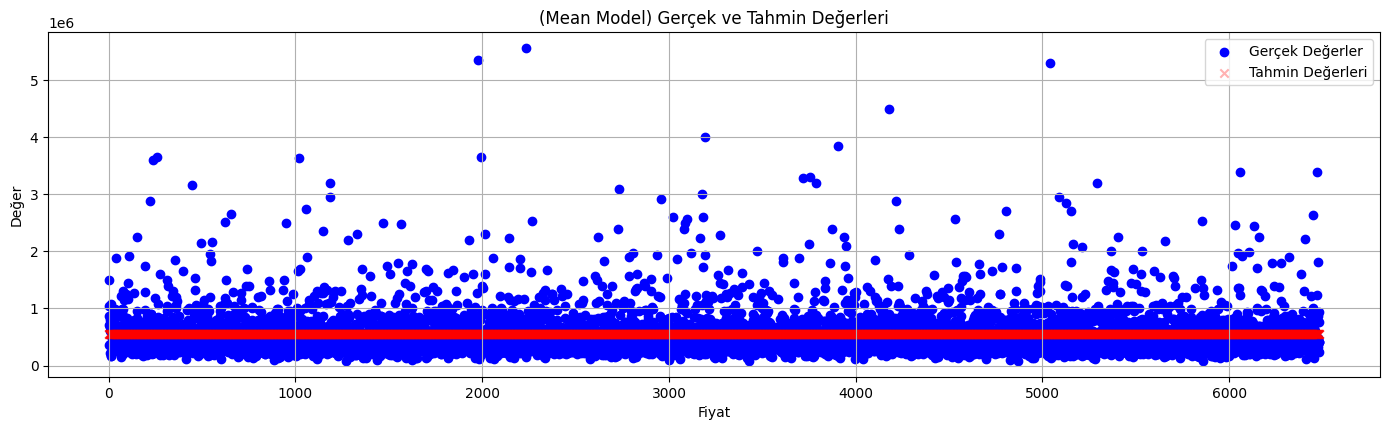

In [29]:
pred_plot(y_test, median_model, "Median Model")
pred_plot(y_test, mean_model, "Mean Model")

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

# Linear Regression modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_lr_pred = lr_model.predict(X_test)

In [32]:
mae, mse, rmse, mape = error_calculator(y_test, y_lr_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression mape: {round(mape)} %")
#457.5854653080385

Linear Regression RMSE: 457.29
Linear Regression mape: 25 %


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**RMSE (Root Mean Squared Error - Kök Ortalama Kare Hatası): 460.47377553177955**
   - RMSE, MSE'nin kareköküdür ve hataların büyüklüğünü aynı ölçekte verir. RMSE, modelin tahminlerinin gerçek değerlerden ortalama olarak 212,036 birim sapma gösterdiğini belirtir. Yine bu değer oldukça yüksek, bu da modelin performansının zayıf olduğunu işaret eder.

Modeliniz bazı iyi tahminler yapabiliyor olabilir, ancak genel olarak hatalar oldukça yüksek ve tahminlerin doğruluğu istenilen seviyede değil. Modelin performansını artırmak için daha fazla veri toplamak, mevcut verileri iyileştirmek veya daha karmaşık modeller denemek gibi stratejiler uygulanabilir.

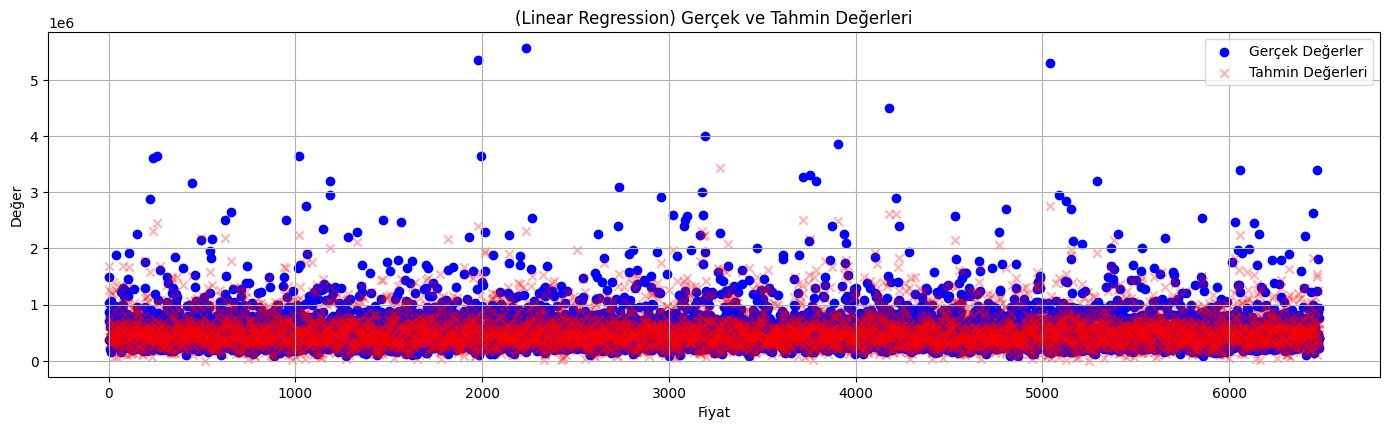

In [33]:
pred_plot(y_test, y_lr_pred, "Linear Regression")

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_rf_pred = rf_model.predict(X_test)

In [36]:
mae, mse, rmse, mape = error_calculator(y_test, y_rf_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression mape: {round(mape)} %")

Linear Regression RMSE: 381.88
Linear Regression mape: 14 %


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


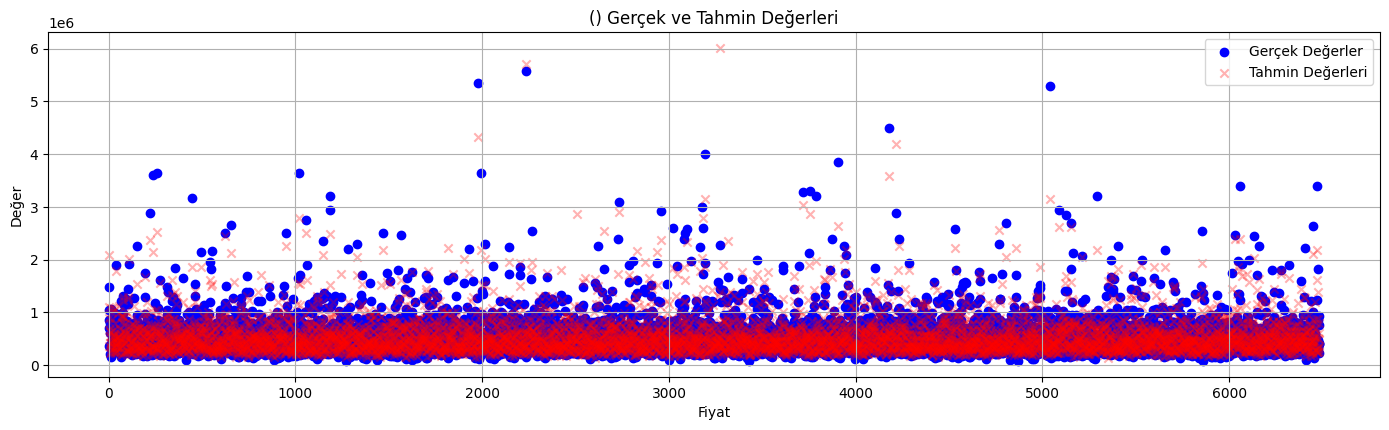

In [37]:
pred_plot(y_test, y_rf_pred, "")

### Lightgbm

In [46]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_lightgbm_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 22
[LightGBM] [Info] Start training from score 537640.173177


In [47]:
mae, mse, rmse, mape = error_calculator(y_test, y_lightgbm_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression mape: {round(mape)} %")

Linear Regression RMSE: 368.53
Linear Regression mape: 13 %


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


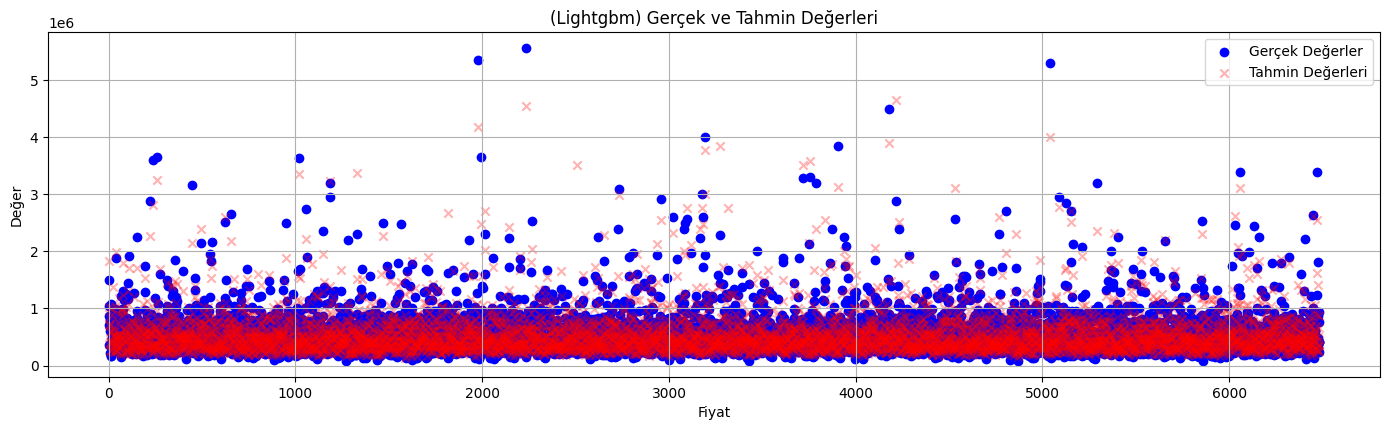

In [48]:
pred_plot(y_test, y_lightgbm_pred, "Lightgbm")

# Modelleri Karşılaştırma

In [50]:
# Ortalama model hataları
_, _, rmse_mean, mape_mean = error_calculator(y_test, mean_model)

# Medyan model hataları
_, _, rmse_median, mape_median = error_calculator(y_test, median_model)

# Doğrusal regresyon hataları
_, _, rmse_linear, mape_linear = error_calculator(y_test, y_lr_pred)

# Decision Tree hataları
_, _, rmse_tree, mape_tree = error_calculator(y_test, y_rf_pred)

# Lightgbm hataları
_, _, rmse_lightgbm, mape_lightgbm = error_calculator(y_test, y_lightgbm_pred)

c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [51]:
rmse_values = pd.DataFrame([{
    "rmse": rmse_mean,
    "model": "Mean Model"
}, {
    "rmse": rmse_median,
    "model": "Median Model"
}, {
    "rmse": rmse_linear ,
    "model": "Linear Model"
}, {
    "rmse": rmse_tree,
    "model": "Decision Tree Model"
}, {
    "rmse": rmse_lightgbm,
    "model": "Lightgbm Model"
}])

rmse_values = rmse_values.sort_values(by="rmse").reset_index().drop(["index"], axis=1)

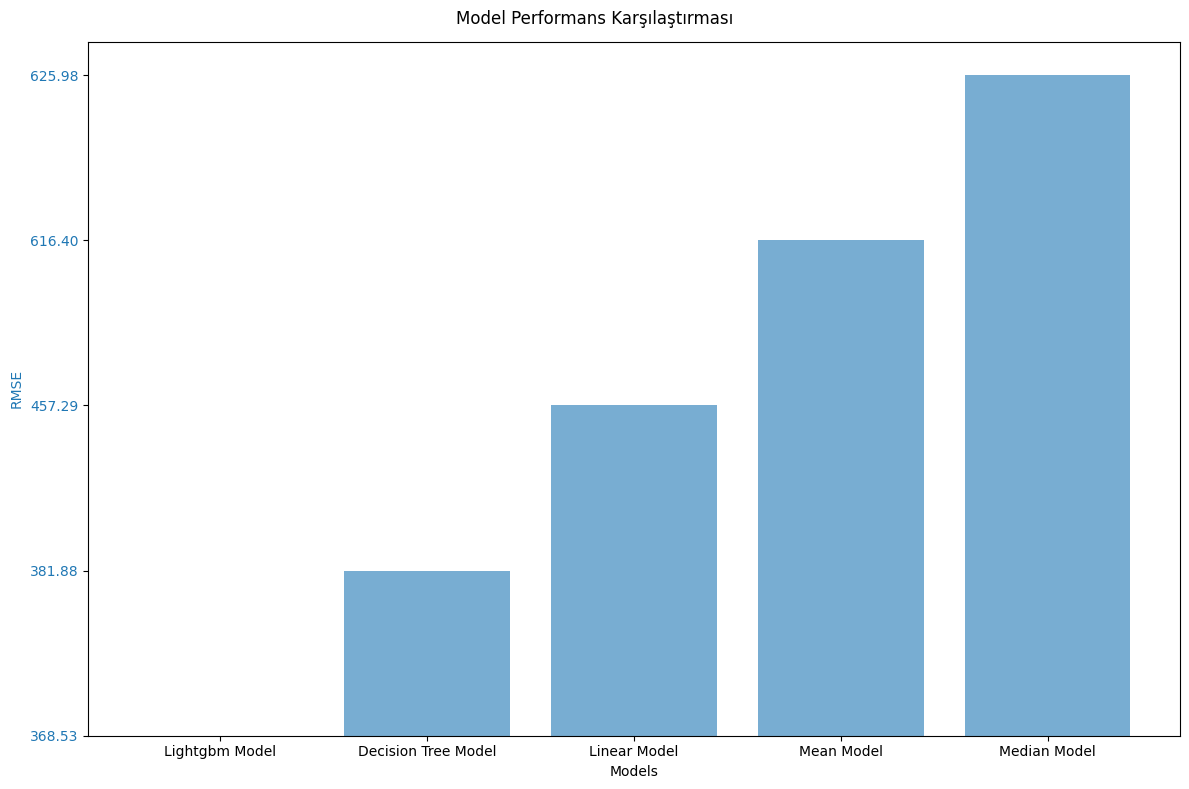

In [52]:
# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(12, 8))

# RMSE için çubuk grafiği
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.bar(rmse_values["model"], rmse_values["rmse"], color='tab:blue', alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Başlık ve gösterge ekleme
fig.suptitle('Model Performans Karşılaştırması')
fig.tight_layout()
plt.show()

### GradientBoostingRegressor

In [49]:

# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error, r2_score
# # Gradient Boosting Regressor
# gbr_model = GradientBoostingRegressor()
# gbr_model.fit(X_train_scaled, y_train)
# gbr_y_pred = gbr_model.predict(X_test_scaled)
# gbr_mse = mean_squared_error(y_test, gbr_y_pred)
# gbr_r2 = r2_score(y_test, gbr_y_pred)
# print(f"Gradient Boosting Regressor MSE: {gbr_mse}")
# print(f"Gradient Boosting Regressor R^2: {gbr_r2}")

# # XGBoost Regressor
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
# xgb_model.fit(X_train_scaled, y_train)
# xgb_y_pred = xgb_model.predict(X_test_scaled)
# xgb_mse = mean_squared_error(y_test, xgb_y_pred)
# xgb_r2 = r2_score(y_test, xgb_y_pred)
# print(f"XGBoost Regressor MSE: {xgb_mse}")
# print(f"XGBoost Regressor R^2: {xgb_r2}")

# # Sonuçların Karşılaştırılması
# results = pd.DataFrame({
#     'Model': ['Gradient Boosting Regressor', 'Random Forest Regressor', 'XGBoost Regressor'],
#     'MSE': [gbr_mse, rf_mse, xgb_mse],
#     'R^2': [gbr_r2, rf_r2, xgb_r2]
# })

# print(results)